# 1a Centered Derivatives

We can approximate partial spatial derivatives with finite differences, and consider the function values $f_{i,jk}$ at discrete points $(i\Delta x,j\Delta y,k\Delta z)$ in three dimension to be variables whose time evolution is governed by ordinary differential equations (ODEs) in time. Using for example a 2nd order finite difference to approximate the spatial derivatives, and looking at a case with constant velocity ${\bf v}$ and a profile $f(r,t)$ that is time independent in the moving coordinate frame ($f({\bf r}_0-{\bf v}t,t) = f({\bf r}_0,0)$), we will need to compute spatial derivatives, with formulae such as

\begin{equation}\tag{1}
\left(\frac{\partial f}{\partial x}\right)_{i,j,k} = \frac{1}{2\Delta x} \left(f_{i+1,j,k}-f_{i-1,j,k}\right)
\end{equation}

The finite difference approximation for the derivative can be derived by considering Taylor series of the function (and therefore assumes that the function is well behaved). We can write:
\begin{align}\tag{2}
f_{i+1,j,k} & = f_{i,j,k} + \left(\frac{\partial f}{\partial x}\right)_{i,j,k} \Delta x + {1 \over 2} \left(\frac{\partial^2 f}{\partial x^2}\right)_{i,j,k} \Delta x^2 + \mathcal{O}(\Delta x^3) \\
f_{i-1,j,k} & = f_{i,j,k} - \left(\frac{\partial f}{\partial x}\right)_{i,j,k} \Delta x + {1 \over 2} \left(\frac{\partial^2 f}{\partial x^2}\right)_{i,j,k} \Delta x^2 + \mathcal{O}(\Delta x^3)
\end{align}
Subtracting the two to remove $f_{i,j,k}$ and rearranging terms we see that in the limit where $\Delta x$ becomes small the error, or difference, between the finite difference equation and the correct value for the derivative should scale like $\Delta x^2$. This is called a second order approximation. Notice that this is an asymptotic scaling; a priori we do not know how large the constant of this second error is, and it entirely depends on the smoothness of the function involved.

To use Python to play around with this, we need a function that returns the spatial derivative in each of the three directions.  To avoid having to specify boundary conditions we assumme that the domain is periodic.  Then we can use the `numpy` function `roll` to quickly and efficiently compute the finite differences.

While we could put import and the derivative function together, it is good practice to have a seperate cell at the top that imports the neccessary modules. Further down, we will need to do plotting. Therefore, we also import the `matplotlib.pyplot` module. 

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def deriv(f, ds, axis = 0):
    """ 
    Compute derivative in the axis-direction, given f[i,j,k] 
    and ds = mesh size in the axis-direction
    """
    return (np.roll(f,-1,axis)-np.roll(f,+1,axis))/(2*ds)

`numpy.roll` (or `np.roll`, because we import `numpy` as `np`) does a "circular shift" (shifting with periodic wrapping). To see documentation for it, do

In [48]:
help(np.roll)

Help on function roll in module numpy:

roll(a, shift, axis=None)
    Roll array elements along a given axis.
    
    Elements that roll beyond the last position are re-introduced at
    the first.
    
    Parameters
    ----------
    a : array_like
        Input array.
    shift : int or tuple of ints
        The number of places by which elements are shifted.  If a tuple,
        then `axis` must be a tuple of the same size, and each of the
        given axes is shifted by the corresponding number.  If an int
        while `axis` is a tuple of ints, then the same value is used for
        all given axes.
    axis : int or tuple of ints, optional
        Axis or axes along which elements are shifted.  By default, the
        array is flattened before shifting, after which the original
        shape is restored.
    
    Returns
    -------
    res : ndarray
        Output array, with the same shape as `a`.
    
    See Also
    --------
    rollaxis : Roll the specified axis backwa

To try the partial derivative on a sin(x) function we create a 3D array with a `sin(x)` function along the x-axis.

Notice that we put a `;` on the last line, this will prevent Jupyter in automatically trying to print the return value from the last function, which in this case will just be some info about what and where things have been plotted.

If you get annoyed by an output window with scroll bars then right-click anywhere on the notebook window and select _Disable scrolling for outputs_

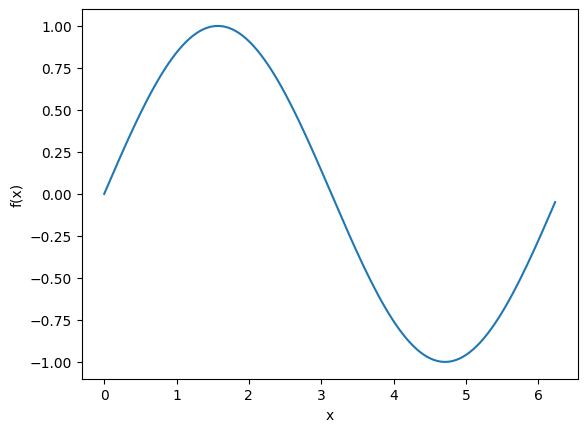

In [49]:
def sinx_3d(m):
    """This function creates a 3D array with sin(x) in the first dimension and zeros in the other two dimensions."""
    f = np.zeros(m)
    x = np.zeros(m[0])
    ds = 2.0*np.pi/np.array(m)
    for i in range(m[0]):
        x[i] = i*ds[0]
        f[i,:,:] = np.sin(x[i])
    return f, x, ds
n = 128
m = (n, n, n)
f, x, ds = sinx_3d(m)
plt.plot(x, f[:,0,0])
plt.xlabel('x')
plt.ylabel('f(x)');

Check the derivative, which should be $cos(x)$

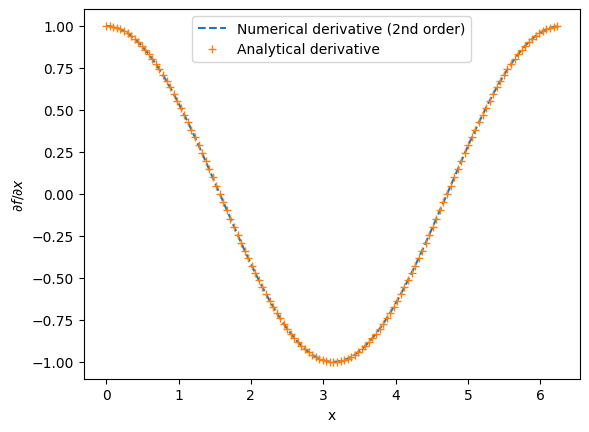

In [50]:
dfdx = deriv(f, ds[0],0)
plt.plot(x, dfdx[:,0,0],'--', label = 'Numerical derivative (2nd order)')
plt.xlabel('x')
plt.ylabel('$\partial f/\partial x$')
plt.plot(x, np.cos(x), '+', label = 'Analytical derivative')
plt.legend();

The `deriv` function also works for 1-D arrays:

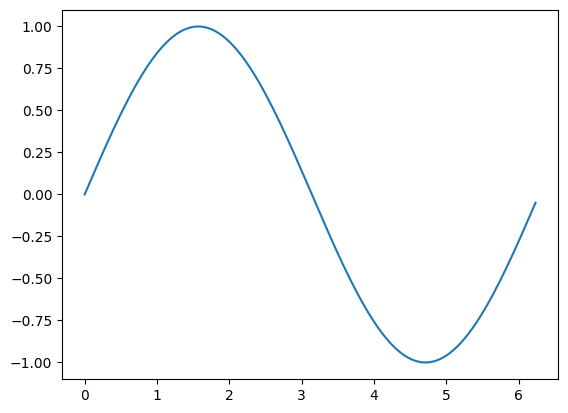

In [51]:
f = np.sin(x)
dx = ds[0]
dfdx = deriv(f,dx)
plt.plot(x,f);

Let's check the size of the error:

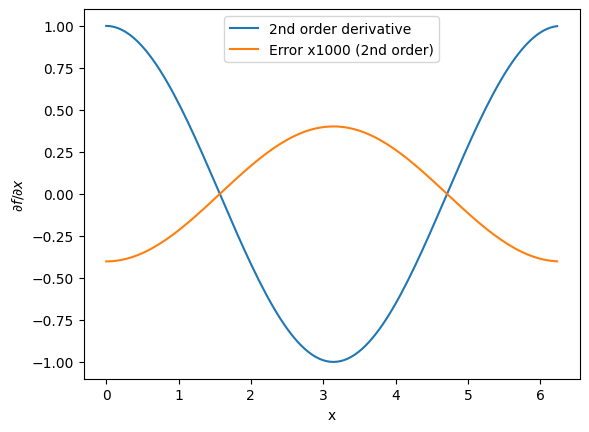

In [52]:
dfdx = deriv(f, dx)
plt.plot(x, dfdx,label = '2nd order derivative')
plt.xlabel('x')
plt.ylabel('$\partial f/\partial x$')
plt.plot(x, 1e3*(dfdx-np.cos(x)), label='Error x1000 (2nd order)')
plt.legend();

Evidently, the error in the finite difference derivative is a very small amount (less than one part in a thousand), with the given resolution (128 points in $2\pi$). We can also see that the error is largest where the curvature of the derivative is largest.   

With lower resolution, the error grows, of course.  How do you think it scales with the resolution?  You can check your answer by modifying the code above (or copying the relevant cells below here):

In [53]:
# Error for different values of n (2nd order)
for n in (8, 16, 32, 64, 128):
    dx = 2.*np.pi/n                                 # Step/mesh size
    x = dx*np.arange(n)                             # x values
    f = np.sin(x)
    d = max(abs(np.cos(x)-deriv(f,dx)))             # Maximum error
    print('n: {:3d}  error: {:.6f}'.format(n,d))

print('--------')

n:   8  error: 0.099684
n:  16  error: 0.025505
n:  32  error: 0.006413
n:  64  error: 0.001606
n: 128  error: 0.000402
--------


We can compute the error for 2nd order derivatives, and make a loglog plot:

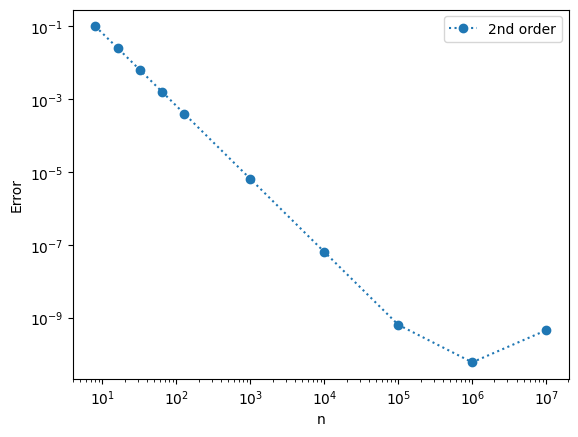

In [54]:
nn = []; d2 = []
for n in (8, 16, 32, 64, 128, 1e3, 1e4, 1e5, 1e6, 1e7):
    dx = 2.*np.pi/n
    x = dx*np.arange(n)
    f = np.sin(x)
    nn.append(n)
    d_2 = max(abs(np.cos(x)-deriv(f,dx)))
    d2.append(d_2)

plt.loglog(nn, d2, 'o', linestyle = ':', label = '2nd order')
plt.xlabel('n'); plt.ylabel('Error')
plt.legend();

In [55]:
# Getting the slopes to see how the error scales with n
from scipy.optimize import curve_fit
def fs(x, a, b):
    return a*x**b

popt2, pcov2 = curve_fit(fs, nn[:5], d2[:5])

print('2nd order: a = {:.2f}, b = {:.2f}'.format(popt2[0], popt2[1]))

2nd order: a = 5.99, b = -1.97


Watch out! In the above example I have defined the error as the maximum of the absolute difference between the analytical derivative and the finite difference approximation. How to define the error is somewhat arbitrary; one could also define it as the typical difference or even the RMS (second order) norm. The important part is to specify what has been done, and sometimes also understand why we get the results we get. E.g. a certain method could give excellent results except at specific points. A maximum norm, as used above, is sensitive to outlier points.

## Task: Compare with 4th order centered derivative

The formula for a 4th order centered derivative is:

\begin{equation}\tag{2}
\left(\frac{\partial f}{\partial x}\right)_{i,j,k} = 
\frac{1}{12 \Delta x} 
\left[
8(f_{i+1,j,k}-f_{i-1,j,k})
-(f_{i+2,j,k}-f_{i-2,j,k})
\right]
\end{equation}

This can be shown be expanding in Taylor series for the four different points and see how terms cancel. Notice that while the error term scales as $(\Delta x)^4$, the prefactor is the fifth derivative of the function. Therefore approximating the derivative of a function with sudden changes -- e.g. a step function -- may result in large errors.

__Task:__ Compute the corresponding errors for the 4th order derivatives, and plot them as filled squares (Python symbol `'s'`), together with the 2nd order errors as filled circles (symbol `'o'`).

__Bonus task:__ Try to increase the number of points from 128 to 1e3, 1e4, 1e5, 1e6, and 1e7 for 2nd and 4th order. Do you understand what goes on with the error?

### __Absalon turn in:__

   1. Replace the ellipses (...) in the following sentence with the 4th order result, and add the code to the notebook below this cell.
   2. Upload the notebook as a pdf

In [56]:
# Defining the function for the fourth order derivative
def deriv_4(f, ds, axis = 0):
    return (8*(np.roll(f, -1, axis) - np.roll(f, +1, axis)) - (np.roll(f, -2, axis) - np.roll(f, +2, axis)))/(12*ds)

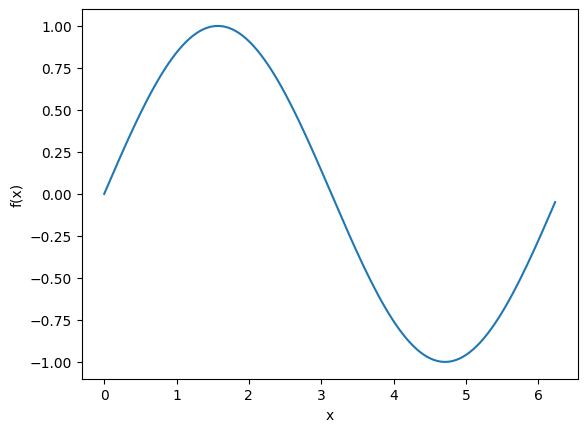

In [57]:
def sinx_3d(m):
    """This function creates a 3D array with sin(x) in the first dimension and zeros in the other two dimensions."""
    f = np.zeros(m)
    x = np.zeros(m[0])
    ds = 2.0*np.pi/np.array(m)
    for i in range(m[0]):
        x[i] = i*ds[0]
        f[i,:,:] = np.sin(x[i])
    return f, x, ds
n = 128
m = (n, n, n)
f, x, ds = sinx_3d(m)
plt.plot(x, f[:,0,0])
plt.xlabel('x')
plt.ylabel('f(x)');

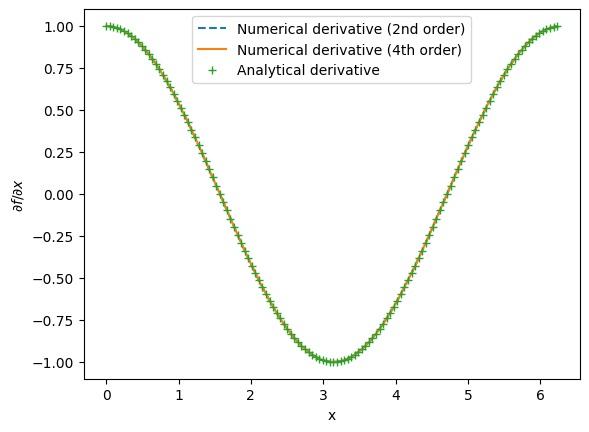

In [58]:
dfdx = deriv(f, ds[0], 0)
dfdx_4 = deriv_4(f, ds[0], 0)
plt.plot(x, dfdx[:,0,0],'--', label = 'Numerical derivative (2nd order)')
plt.plot(x, dfdx_4[:,0,0], label = 'Numerical derivative (4th order)')
plt.xlabel('x')
plt.ylabel('$\partial f/\partial x$')
plt.plot(x, np.cos(x), '+', label = 'Analytical derivative')
plt.legend();

In [59]:
# Error for different values of n (4th order)
for n in (8, 16, 32, 64, 128):
    dx = 2.*np.pi/n
    x = dx*np.arange(n)
    f = np.sin(x)
    d = max(abs(np.cos(x)-deriv_4(f,dx)))
    print('n: {:3d}  error: {:.6f}'.format(n,d))

n:   8  error: 0.011785
n:  16  error: 0.000778
n:  32  error: 0.000049
n:  64  error: 0.000003
n: 128  error: 0.000000


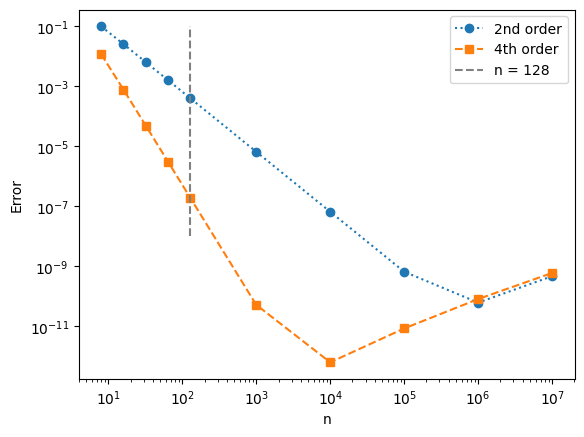

In [60]:
nn = []; d2 = []; d4 = []
for n in (8, 16, 32, 64, 128, 1e3, 1e4, 1e5, 1e6, 1e7):
    dx = 2.*np.pi/n
    x = dx*np.arange(n)
    f = np.sin(x)
    nn.append(n)
    d_2 = max(abs(np.cos(x)-deriv(f,dx)))
    d2.append(d_2)
    d_4 = max(abs(np.cos(x)-deriv_4(f,dx))) 
    d4.append(d_4)

plt.loglog(nn, d2, 'o', linestyle = ':', label = '2nd order')
plt.loglog(nn, d4, 's', linestyle = '--', label = '4th order')
plt.vlines(128, linestyle = '--', ymin = 1e-8, ymax = 1e-1, color = 'gray', label = 'n = 128')
plt.xlabel('n'); plt.ylabel('Error')
plt.legend();

In [61]:
popt4, pcov4 = curve_fit(fs, nn[:5], d4[:5])

print('4th order: a = {:.2f}, b = {:.2f}'.format(popt4[0], popt4[1]))

4th order: a = 40.96, b = -3.92


_So, while the error at `n = 128` is less than a part in a thousand for 2nd order, it's less than a part in $10^{7}$ with 4th order! The error scales as $n^{-4}$ for 4th order, which is evident from the slope of the curve in the log-log plot. Increasing the number of points show, that for both the 2nd and 4th order, the error decreases as $n$ increases. Around $n = 10^{4}$ the error reaches its minimum for the 4th order and then starts increasing. This is due to the round-off error - as $n$ becomes very large, the step size ($\sim 1/n$) becomes very small, which amplifies the effects of the numerical round-off error. This effect is seen around $n = 10^{6}$ for the 2nd order, as it uses fewer calculations per step compared to the 4th order._